In [1]:
import matplotlib.pyplot as plt
import numpy as np

from tools import scatter_2d_data, bar_per_axis


def gen_data(
    n: int,
    k: int,
    mean: np.ndarray,
    var: np.float64
) -> np.ndarray:
    '''Generate n values samples from the k-variate
    normal distribution
    '''
    cov = (var**2)*np.identity(k)  # Diagonal covariance matrix
    samples = np.random.multivariate_normal(mean, cov, size=n)
    return np.array(samples)

In [2]:
np.random.seed(1234)
gen_data(2, 3, np.array([0, 1, -1]), 1.3)

array([[ 0.61286571, -0.5482684 ,  0.86251906],
       [-0.40644746,  0.06323465,  0.15331182]])

In [3]:
np.random.seed(1234)
print(gen_data(5, 1, np.array([0.5]), 0.5))

[[ 0.73571758]
 [-0.09548785]
 [ 1.21635348]
 [ 0.34367405]
 [ 0.13970563]]


Section 2

In [4]:
def scatter_2d_data(data: np.ndarray):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(data[:, 0], data[:, 1])
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    plt.show()

In [5]:
np.random.seed(1234)
x = gen_data(300, 2, [-1, 2], np.sqrt(4))

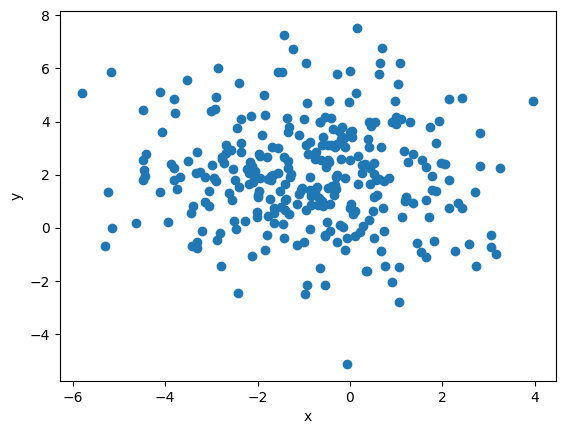

In [6]:
scatter_2d_data(x)

In [7]:
def bar_per_axis(data: np.ndarray):
    for i in range(data.shape[1]):
        plt.subplot(1, data.shape[1], i+1)
        plt.hist(data[:, i], 100)
        plt.title(f'Dimension {i+1}')
    plt.show()


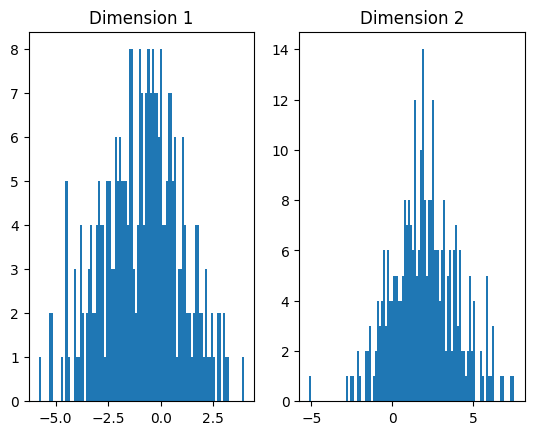

In [8]:
bar_per_axis(x)

In [9]:
np.mean(x, axis=0)

array([-0.8558057 ,  1.96095372])

Section 3

In [10]:
def update_sequence_mean(
    mu: np.ndarray,
    x: np.ndarray,
    n: int
) -> np.ndarray:
    '''Performs the mean sequence estimation update
    '''
    mu_n = mu + (x-mu)/n
    return mu_n

In [11]:
np.random.seed(1234)
mean = np.mean(x, 0)
new_x = gen_data(1,2,np.array([0,0]),1)
update_sequence_mean(mean,new_x, x.shape[0]+1)

array([[-0.85139627,  1.95048219]])

Section 4

In [19]:
def _plot_sequence_estimate():
    data = gen_data(100,2, np.array([0,0]), 3) # Set this as the data
    estimates = [np.array([0, 0])]
    for i in range(data.shape[0]):
        next_mu = update_sequence_mean(estimates[i], data[i], i+1)
        estimates.append(next_mu)
    plt.plot([e[0] for e in estimates], label='First dimension')
    plt.plot([e[1] for e in estimates], label = 'Second dimension')
    plt.legend(loc='upper center')
    plt.savefig('4_1.png')
    print(estimates[99])
    plt.show()


[-0.17059146  0.17525741]


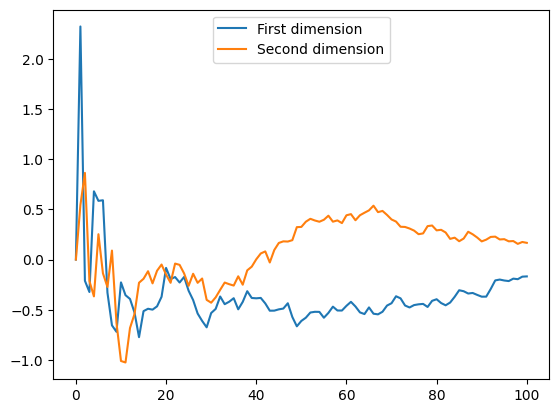

In [20]:
_plot_sequence_estimate()

In [21]:
def _square_error(y, y_hat):
    y_hat = np.array(y_hat)
    error = (y-y_hat)**2
    return np.mean(error,axis = 1)

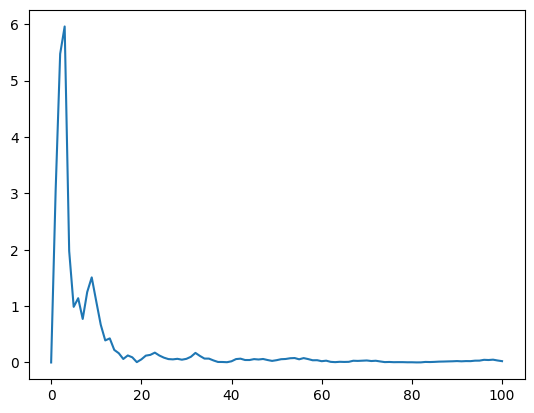

In [23]:
def _plot_mean_square_error():
    data = gen_data(100,2, np.array([0,0]), 3) # Set this as the data
    estimates = [np.array([0, 0])]
    for i in range(data.shape[0]):
        next_mu = update_sequence_mean(estimates[i], data[i], i+1)
        estimates.append(next_mu)
        
    sqerror = _square_error(np.array([0,0]), estimates)
    plt.plot(sqerror)
    plt.savefig('5_1.png')
    plt.show()

_plot_mean_square_error()
    

Optional Section

In [13]:
def gen_changing_data(
    n: int,
    k: int,
    start_mean: np.ndarray,
    end_mean: np.ndarray,
    var: np.float64
) -> np.ndarray:
    '''Generate n samples from the k-variate normal distribution
       with a mean that changes gradually from start_mean to end_mean
    '''
    cov = (var**2) * np.identity(k)  # Diagonal covariance matrix
    
    # Precompute a linear adjustment to the mean
    delta_mean = (end_mean - start_mean) / (n - 1)  # Step size for the mean change
    
    samples = []
    for i in range(n):
        # Interpolate the mean for the current step
        current_mean = start_mean + i * delta_mean
        # Generate a sample with the current mean
        sample = np.random.multivariate_normal(current_mean, cov)
        samples.append(sample)
    
    return np.array(samples)



In [28]:

n = 500  # Number of samples
k = 3    # Number of dimensions
start_mean = np.array([0, 1, -1])  # Starting mean vector
end_mean = np.array([1, -1, 0])    # Ending mean vector
sigma = 3.0  # Standard deviation for each dimension
alpha = 0.1 # forgetting factor

# Generate the data
samples = gen_changing_data(n, k, start_mean, end_mean, sigma)
print(samples[:2])


[[-0.81968211 -2.20773952 -5.47224896]
 [ 1.20275229  6.94195199 -1.9833115 ]]


In [25]:
def update_sequence_mean_changing(
    mu: np.ndarray,
    x: np.ndarray,
    alpha: float
) -> np.ndarray:
    '''Performs the mean sequence estimation update with a forgetting factor (alpha)'''
    # Update the mean using the forgetting factor
    mu_n = alpha * x + (1 - alpha) * mu
    return mu_n


In [42]:
def _plot_changing_sequence_estimate():
    # remove this if you don't go for the independent section
    data = gen_changing_data(n, k, start_mean, end_mean, sigma) # Set this as the data
    estimates = [np.zeros(k)]
    for i in range(data.shape[0]):
        next_mu = update_sequence_mean_changing(estimates[i], data[i],alpha)
        estimates.append(next_mu)
    for i in range(k):
        plt.plot([e[i] for e in estimates], label=f'Dimension {i+1}')
    plt.legend(loc='upper center')
    plt.savefig('indep_1.png')
    plt.show()


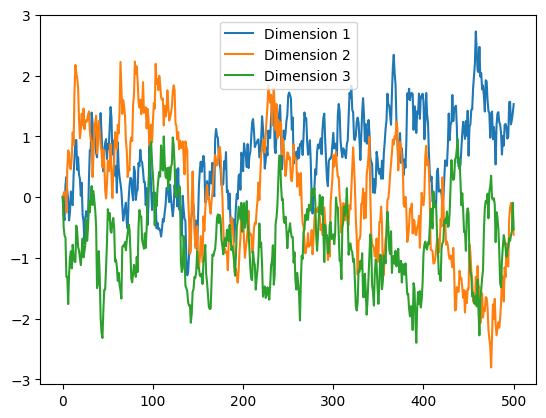

In [43]:
_plot_changing_sequence_estimate()

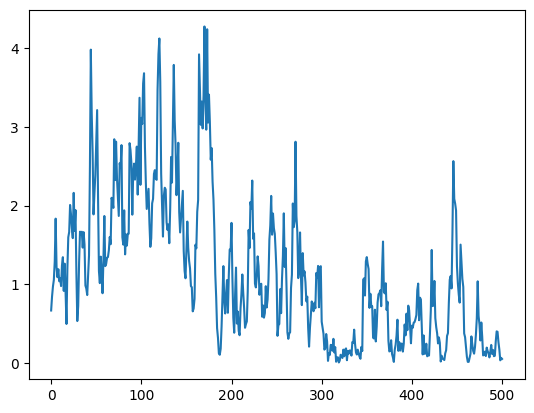

In [45]:
def _plot_mean_square_error_changing():
    data = gen_changing_data(n, k, start_mean, end_mean, sigma) # Set this as the data
    estimates = [np.zeros(k)]
    for i in range(data.shape[0]):
        next_mu = update_sequence_mean_changing(estimates[i], data[i], alpha)
        estimates.append(next_mu)
        
    sqerror = _square_error(end_mean, estimates)
    plt.plot(sqerror)
    plt.savefig('indep_2.png')
    plt.show()

_plot_mean_square_error_changing()